In [102]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from keras.utils import np_utils  

In [103]:
def load_mnist(path, kind='train'):

    labels_path = str(path+'/{}-labels.idx1-ubyte'.format(kind))
    images_path = str(path+'/{}-images.idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        
    return images, labels

In [104]:
# show the number image
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')
    plt.show()  

In [105]:
# show the image and the label
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
 
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [114]:
# read the data in the path
datapath = "C:/Users/user/Desktop/MNIST dataset"
X_train, Y_train = load_mnist(path=datapath)
X_test, Y_test = load_mnist(path=datapath, kind="t10k")

# reshape data to number of data * pixel28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


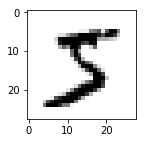

In [107]:
plot_image(X_train[0])

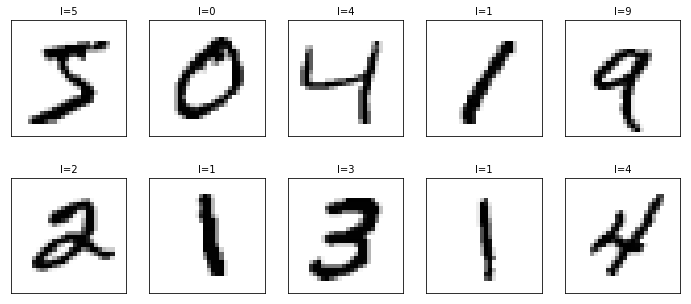

In [108]:
plot_images_labels_predict(X_train, Y_train, [], 0, 10)

In [109]:
# Data pre-processing
# Normalization  
X_train_norm = X_train/255
X_test_norm = X_test/255

# Label Onehot encoding  
Y_trainOneHot = np_utils.to_categorical(Y_train)
Y_testOneHot = np_utils.to_categorical(Y_test)
